In [ ]:
!ls

drive  sample_data


In [ ]:
!cp -r ./drive/MyDrive/finance/lending\ club/* .

In [ ]:
!cp -r ./drive/MyDrive/finance/SBA\ loan/* .

In [ ]:
!pip install association-metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for association-metrics: filename=association_metrics-0.0.1-py3-none-any.whl size=3952 sha256=841fd901bdd378e348114e666bd2c320d341ccfd7292b34f79d33f28421858ec
  Stored in directory: /root/.cache/pip/wheels/b4/9c/17/2dccdebc4365f2a5a620485e89f8171e6a827ade4282cacac8
Successfully built association-metrics


In [ ]:
# Magic function that will make your plot outputs appear and be stored within the notebook
%matplotlib inline

# Function used to to render higher resolution images
%config InlineBackend.figure_format = 'retina'

# Data manipulation
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import missingno as msno 

# Standardizing the style for the visualizations 
sns.set_theme()
sns.set(font_scale=1.2)
sns.set_palette("pastel")
plt.style.use('seaborn-whitegrid')

# Feature selection and data preprocessing 
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder)
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
import association_metrics as am

# Machine learning models and utilities 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import (Sequential, Model)
from tensorflow.keras.layers import (Dense, Dropout)
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             classification_report)


# ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Reading the dataset csv. file 

df_lc_acc = pd.read_csv("./accepted_2007_to_2018Q4.csv.gz",
                 compression='gzip',
                 low_memory=True)

In [ ]:
df_lc_acc.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
# Reading the dataset csv. file 

df_lc_rej = pd.read_csv("./rejected_2007_to_2018Q4.csv.gz",
                 compression='gzip',
                 low_memory=True)

In [ ]:
#Inspecting "loan_status" column unique values

df_lc_acc["loan_status"].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [ ]:
target_loan= ["Fully Paid","Charged Off"]
df=df_lc_acc[df_lc_acc["loan_status"].isin(target_loan)]

In [ ]:
df.shape

(1345310, 151)

In [ ]:
df = df[:100000]

In [ ]:
df.shape

(100000, 151)

In [ ]:
features_to_keep = df.columns[((df.isnull().sum()/len(df))*100 < 20)].to_list()
features_to_keep

['id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'ch

In [ ]:

trim=["addr_state","annual_inc","dti","emp_length","fico_range_high","fico_range_low",
     "grade","home_ownership","installment","int_rate","loan_amnt","loan_status","mort_acc",
     "open_acc","pub_rec_bankruptcies","purpose","revol_util","sub_grade","term","total_acc"]

In [ ]:
df_trim=df[trim]

In [ ]:
df_trim.shape

(100000, 20)

In [ ]:
df_trim.corr()

,annual_inc,dti,fico_range_high,fico_range_low,installment,int_rate,loan_amnt,mort_acc,open_acc,pub_rec_bankruptcies,revol_util,total_acc
annual_inc,1.000000,-0.142739,0.060527,0.060526,0.258046,-0.084107,0.261318,0.186325,0.110297,-0.043501,0.039163,0.141075
dti,-0.142739,1.000000,-0.054383,-0.054381,0.000165,0.183954,0.010982,-0.032872,0.263531,-0.033672,0.152749,0.209571
fico_range_high,0.060527,-0.054383,1.000000,1.000000,0.098616,-0.392119,0.131779,0.099552,0.053935,-0.218194,-0.422774,0.035450
fico_range_low,0.060526,-0.054381,1.000000,1.000000,0.098618,-0.392122,0.131783,0.099551,0.053937,-0.218197,-0.422774,0.035451
installment,0.258046,0.000165,0.098616,0.098618,1.000000,0.096586,0.955914,0.204105,0.175318,-0.102695,0.116035,0.187707
int_rate,-0.084107,0.183954,-0.392119,-0.392122,0.096586,1.000000,0.121580,-0.086694,-0.024319,0.077763,0.186687,-0.046507
loan_amnt,0.261318,0.010982,0.131779,0.131783,0.955914,0.121580,1.000000,0.228642,0.194524,-0.106282,0.105901,0.215424
mort_acc,0.186325,-0.032872,0.099552,0.099551,0.204105,-0.086694,0.228642,1.000000,0.128509,0.027327,0.017938,0.359439
open_acc,0.110297,0.263531,0.053935,0.053937,0.175318,-0.024319,0.194524,0.128509,1.000000,-0.037618,-0.163795,0.712331
pub_rec_bankruptcies,-0.043501,-0.033672,-0.218194,-0.218197,-0.102695,0.077763,-0.106282,0.027327,-0.037618,1.000000,-0.107709,0.050735


Text(0.5, 1.0, 'Loan status count')

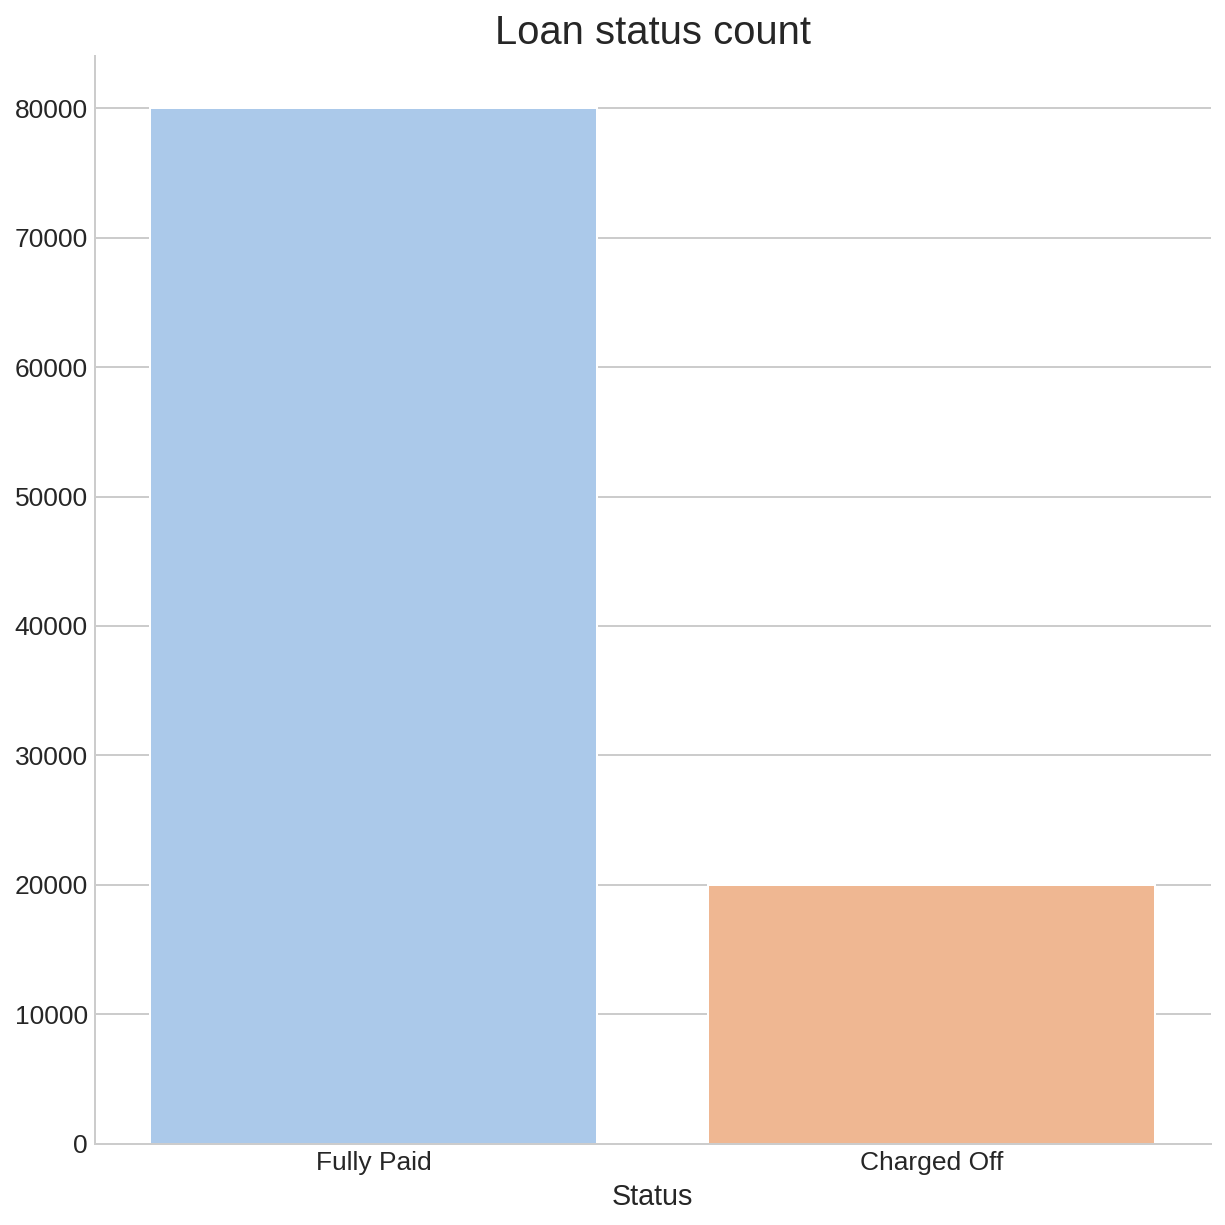

In [ ]:
# Loan status (target) value balance visualization 

fig, ax =plt.subplots(figsize=(10,10))
sns.despine()
sns.countplot(data=df_trim,x="loan_status")
ax.set(xlabel='Status', ylabel='')
ax.set_title('Loan status count', size=20)

Text(0.5, 1.0, 'Loan count by state')

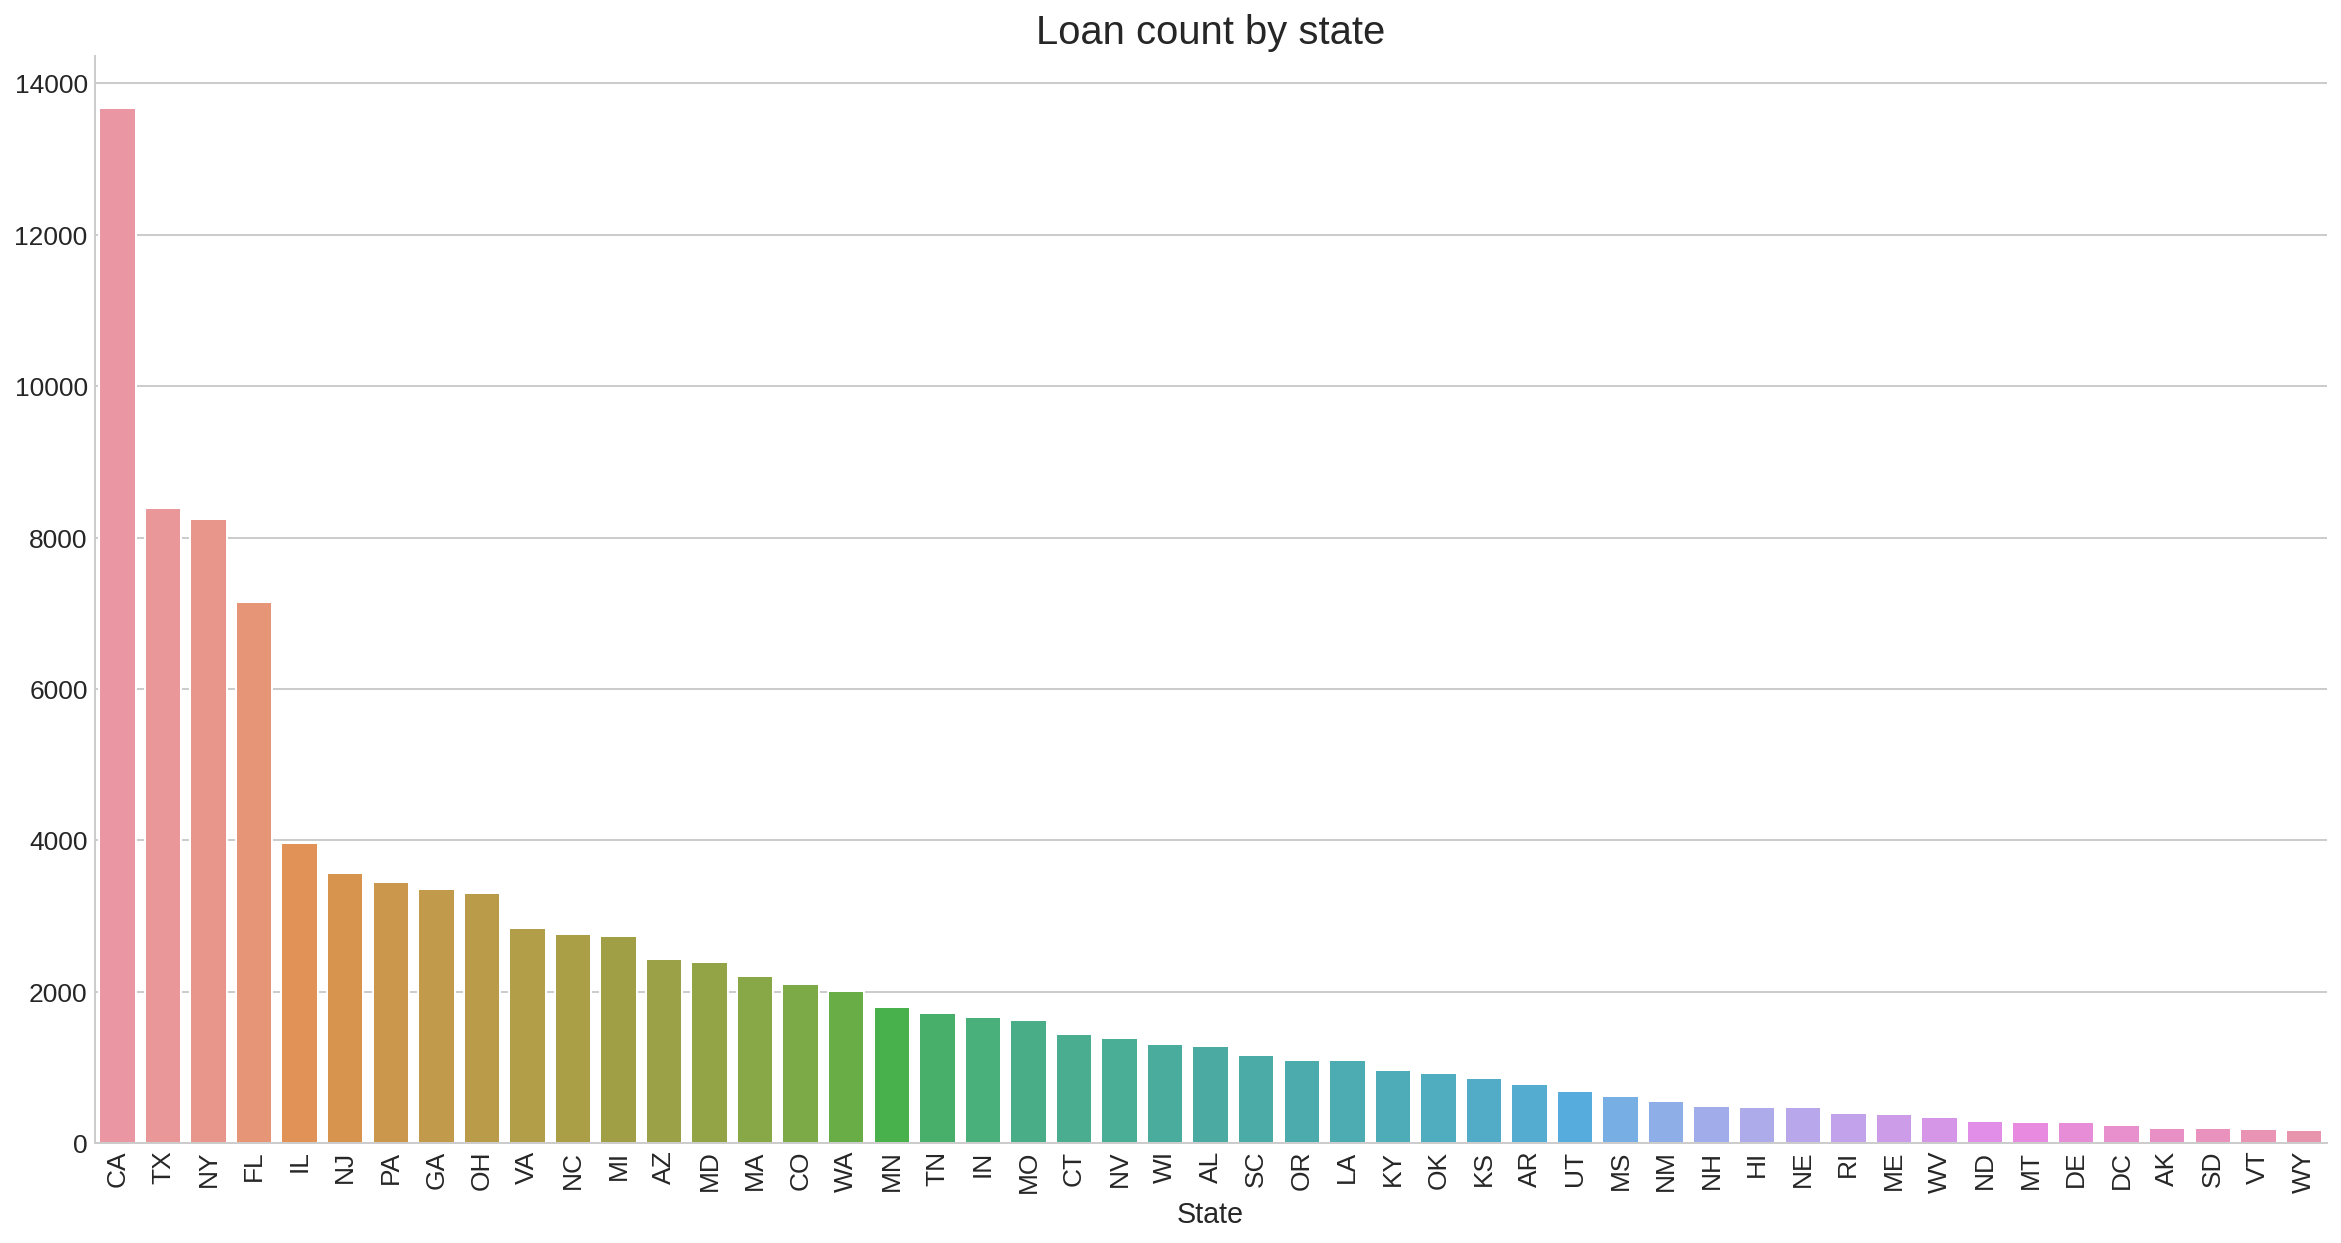

In [ ]:
# Visualization for total loan count by state (In the USA)

fig, ax =plt.subplots(figsize=(20,10))
sns.despine()
order = df_trim["addr_state"].value_counts().index
sns.countplot(data=df_trim,x="addr_state",order=order)
ax.tick_params(axis='x', labelrotation=90)
ax.set(xlabel='State', ylabel='')
ax.set_title('Loan count by state', size=20)

In [ ]:
# Cloropleth visualization for "Fully Paid Loans"

target_loan= ["Fully Paid"]
map_fp=df_trim[df_trim["loan_status"].isin(target_loan)]
m=map_fp[["addr_state","loan_status"]]
m=m.groupby(["addr_state"])["loan_status"].agg('count').reset_index()

fig = go.Figure(data=go.Choropleth(
    locations=m["addr_state"], # Spatial coordinates
    z = m["loan_status"].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'bluyl',
    colorbar_title = "Fully Paid Loans",
))

fig.update_layout(
    title_text = 'Fully Paid Loans 2008-2018 timeframe',
    geo_scope='usa', # limit the map scope to USA
)

Text(0.5, 1.0, 'Employment length')

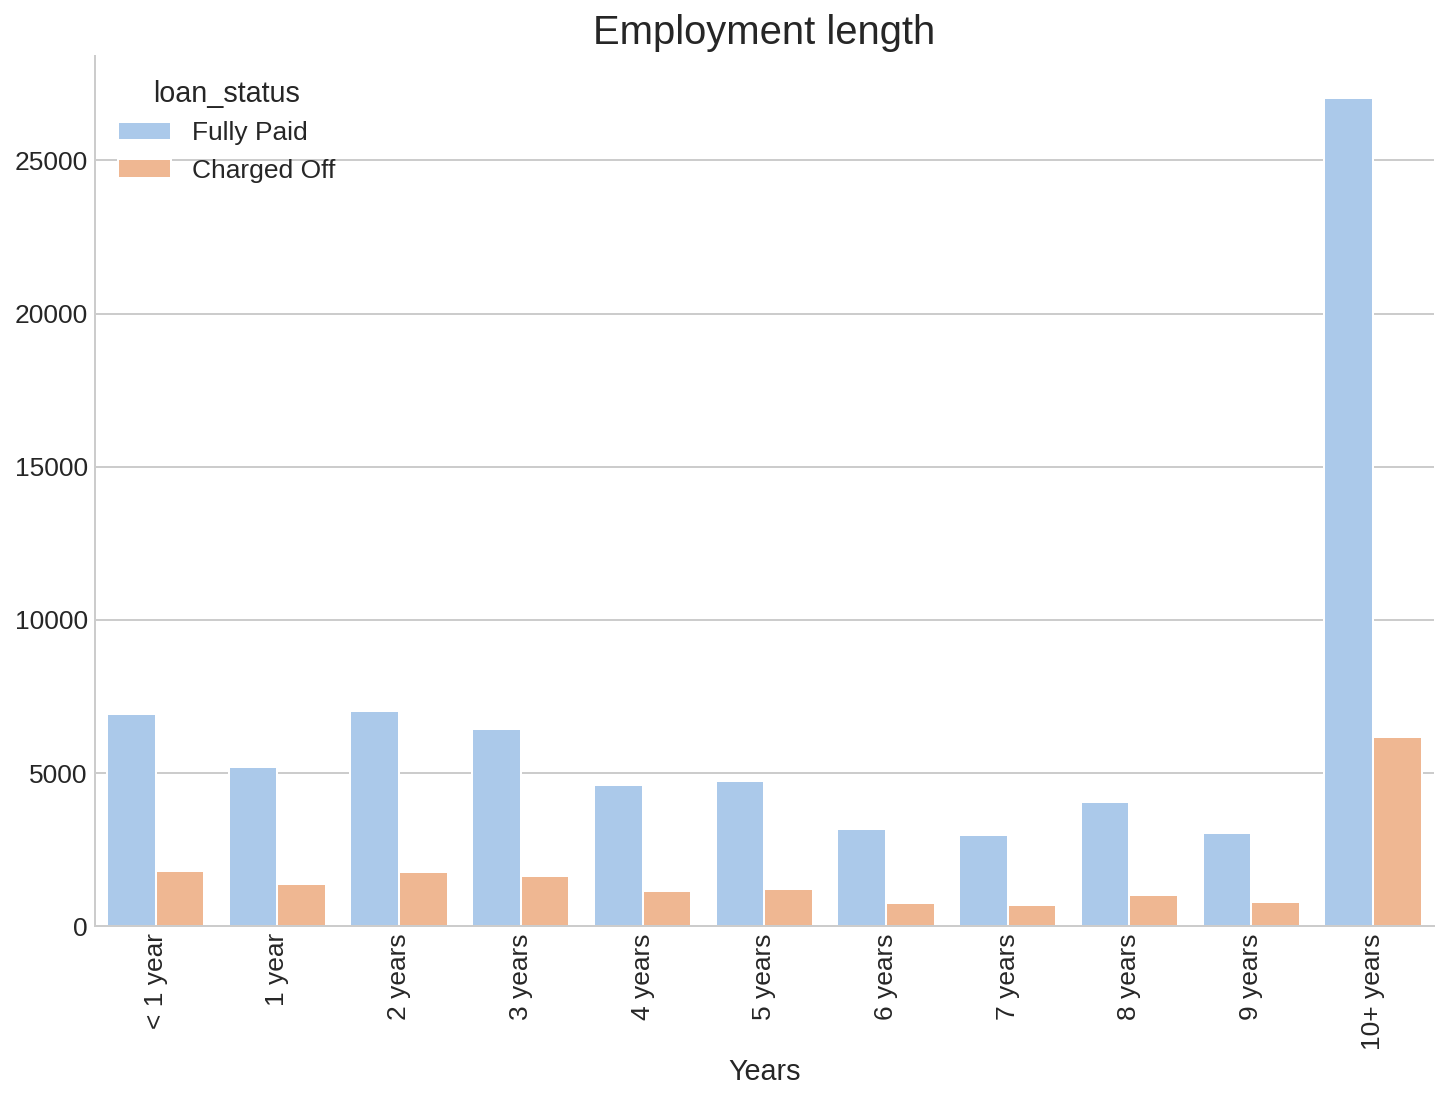

In [ ]:
# Employment length count by loan status

fig, ax =plt.subplots(figsize=(12,8)) 
sns.despine()
order=["< 1 year", "1 year","2 years", "3 years", "4 years", "5 years",
      "6 years", "7 years", "8 years", "9 years", "10+ years"]
sns.countplot(data=df_trim,x="emp_length",hue="loan_status",order=order)
ax.tick_params(axis='x', labelrotation=90)
ax.set(xlabel='Years', ylabel='')
ax.set_title('Employment length', size=20)

Text(0.5, 1.0, 'Term of the loan')

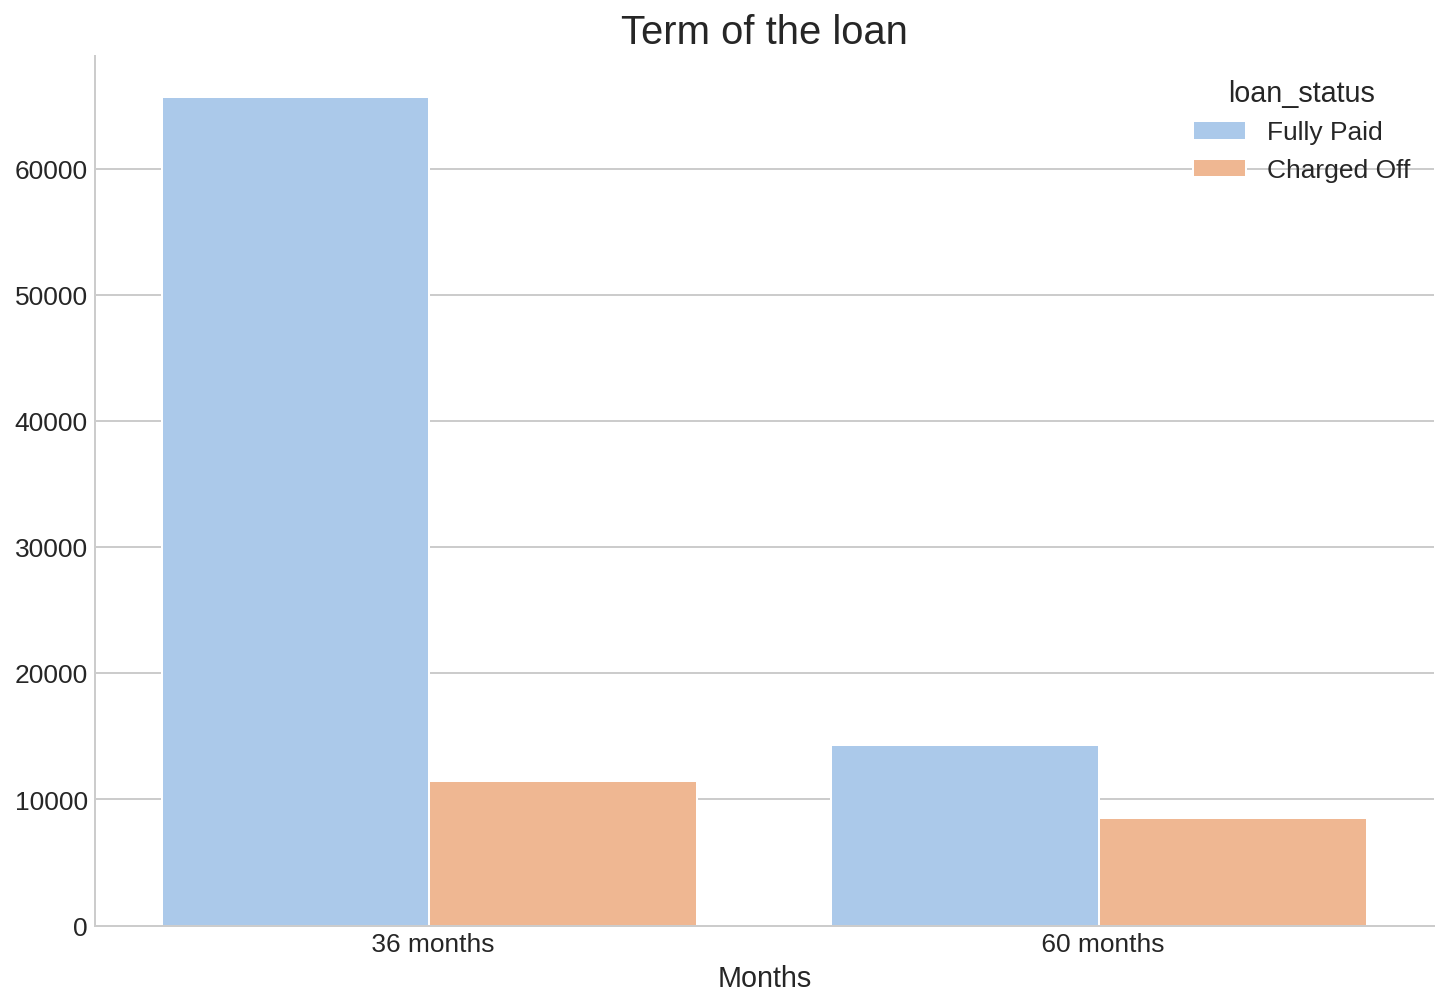

In [ ]:
# Term count by loan status

fig, ax =plt.subplots(figsize=(12,8)) 
sns.despine() 
order=sorted(df["term"].unique())
sns.countplot(data=df_trim,x="term",hue="loan_status",order=order)
ax.tick_params(axis='x', labelrotation=0)
ax.set(xlabel='Months', ylabel='')
ax.set_title('Term of the loan', size=20)

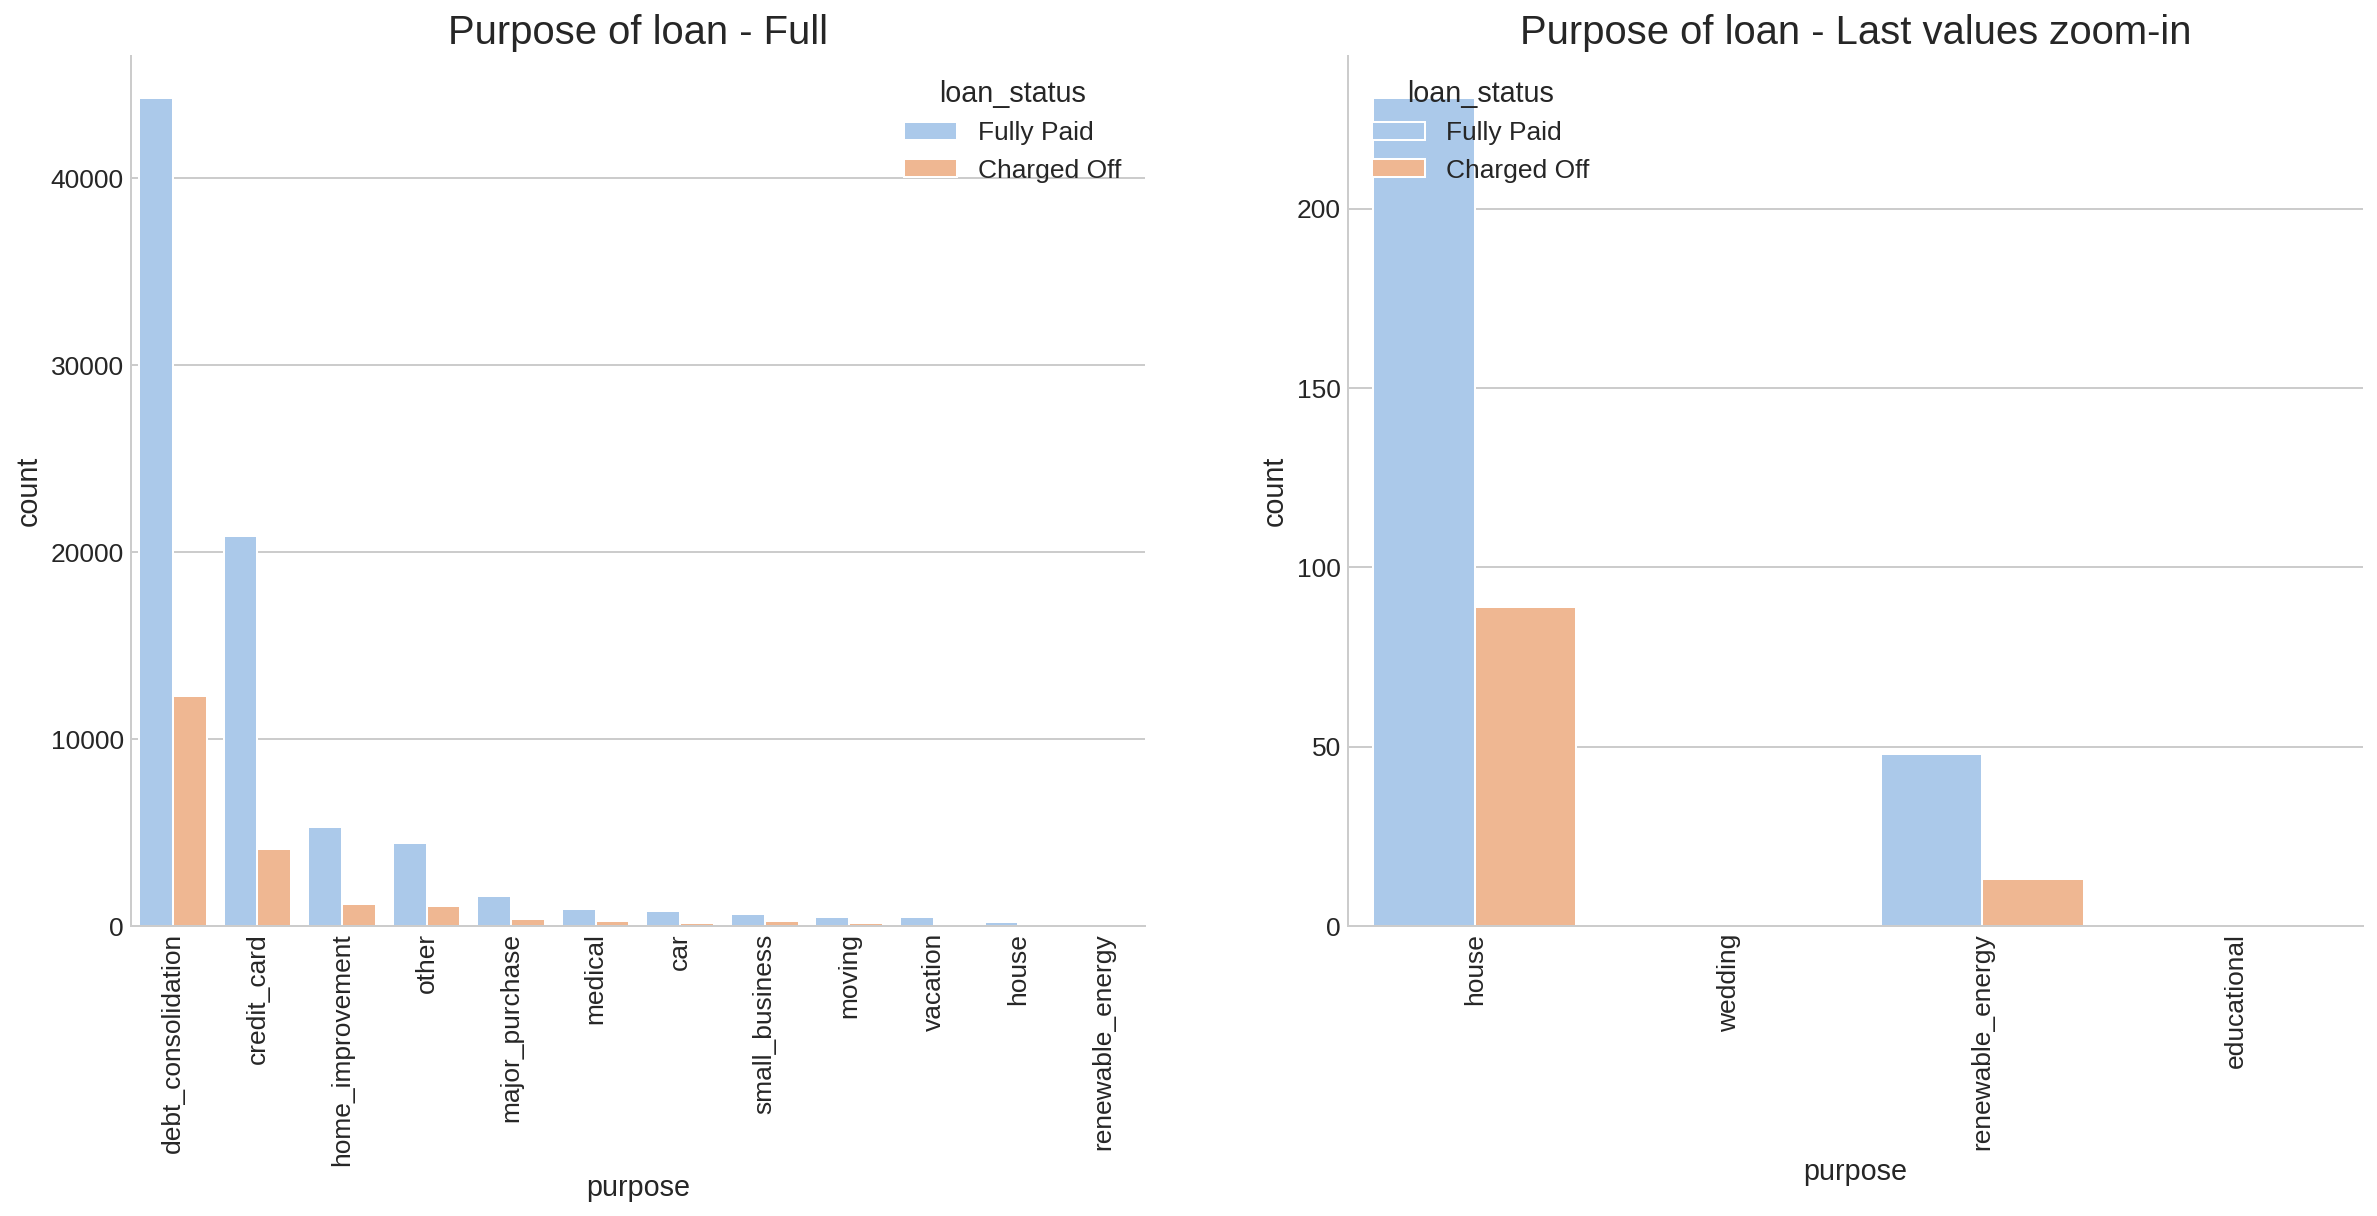

In [ ]:
# Purpose of loan count by loan status

fig, ax =plt.subplots(1,2,figsize=(20,8))

sns.despine() 

ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set(xlabel='Purpose', ylabel='')
ax[0].set_title('Purpose of loan - Full', size=20)
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set(xlabel='Purpose', ylabel='')
ax[1].set_title('Purpose of loan - Last values zoom-in', size=20)

sns.countplot(data=df_trim,x="purpose",hue="loan_status",
              order=df_trim["purpose"].value_counts().index,ax=ax[0])

sns.countplot(data=df_trim,x="purpose",hue="loan_status",
              order=["house","wedding","renewable_energy",
                    "educational"],ax=ax[1])

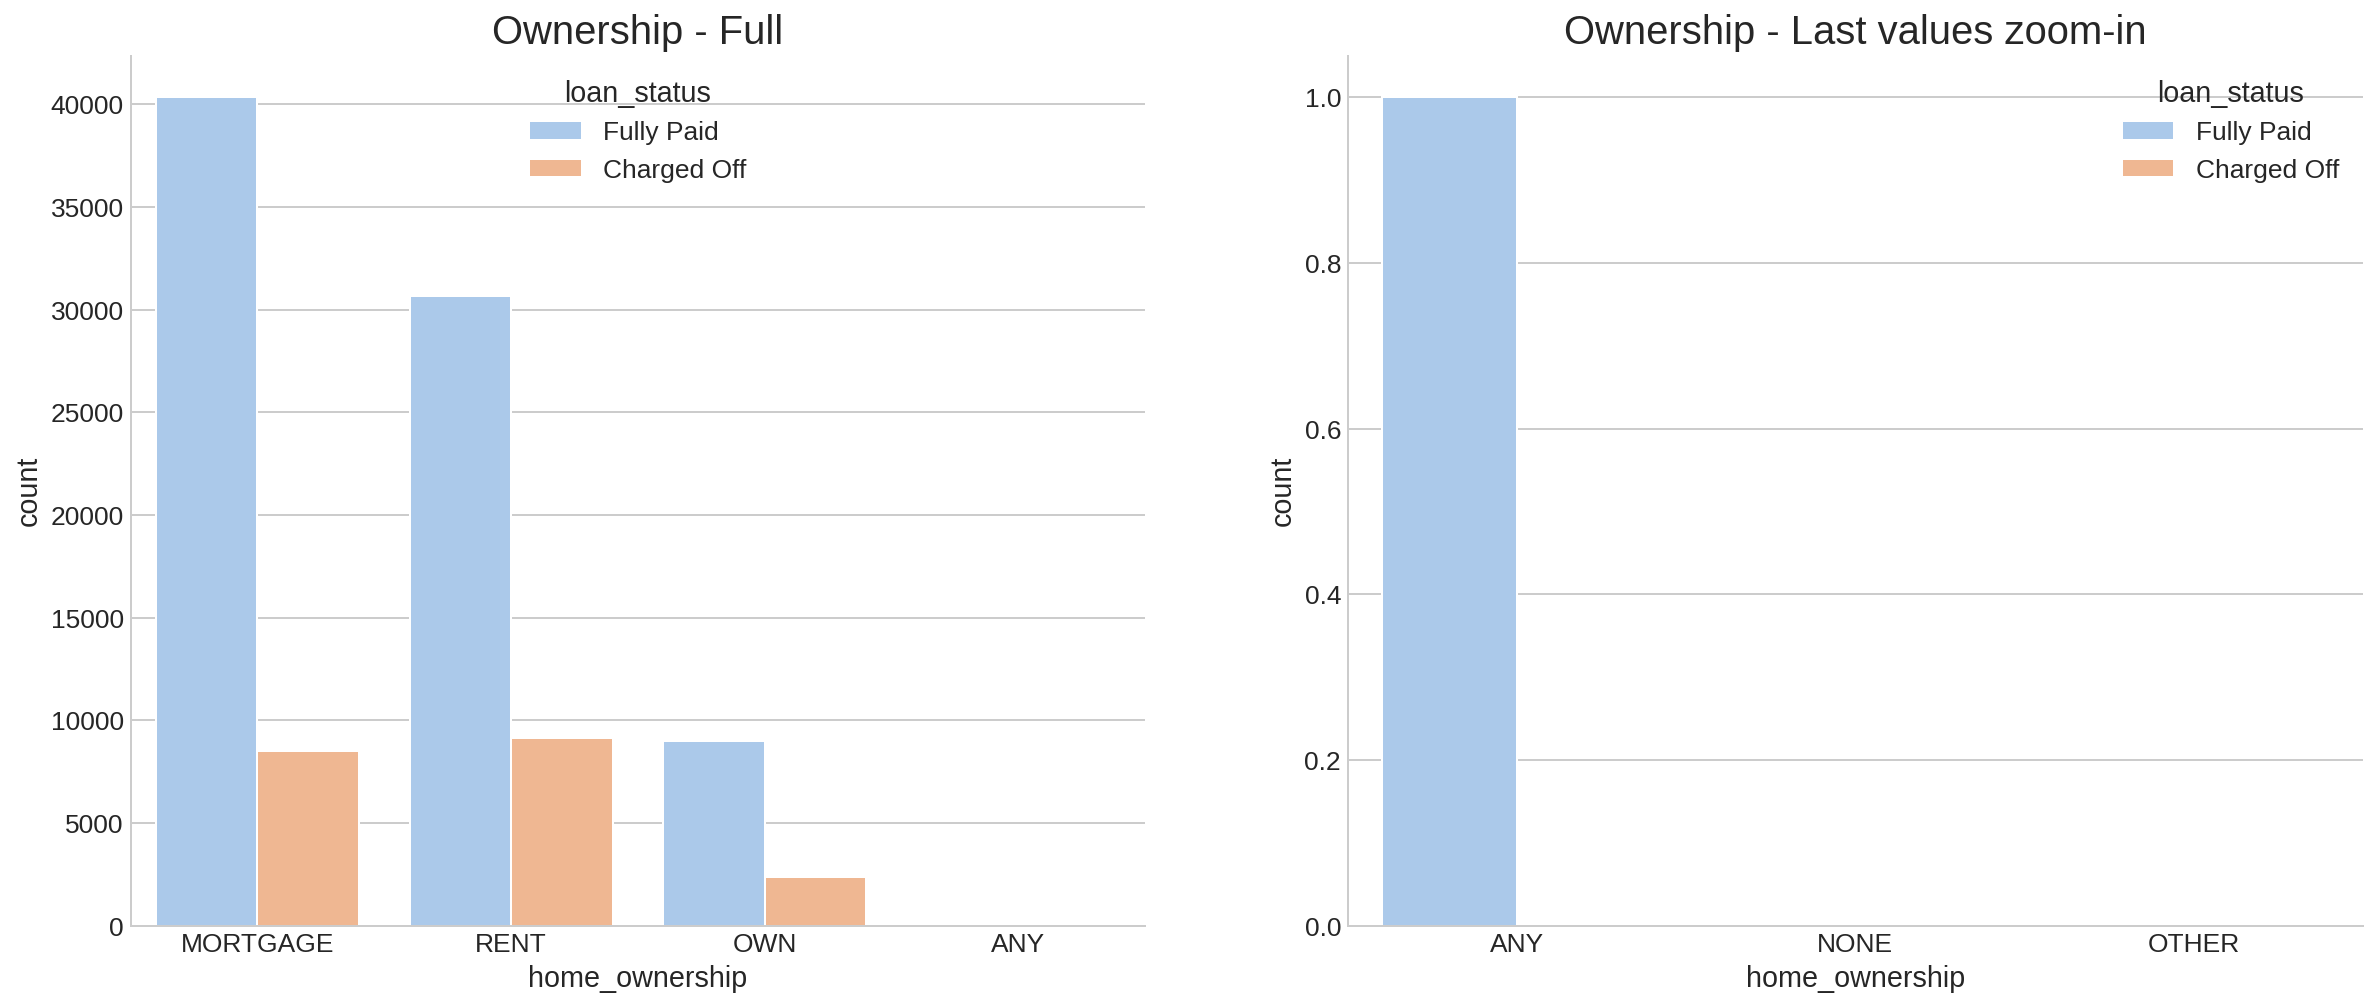

In [ ]:

fig, ax =plt.subplots(1,2,figsize=(20,8))

sns.despine() 

ax[0].tick_params(axis='x', labelrotation=0)
ax[0].set(xlabel='Ownership status', ylabel='')
ax[0].set_title('Ownership - Full', size=20)
ax[1].tick_params(axis='x', labelrotation=0)
ax[1].set(xlabel='Ownership status', ylabel='')
ax[1].set_title('Ownership - Last values zoom-in', size=20)

sns.countplot(data=df_trim,x="home_ownership",hue="loan_status",ax=ax[0])
sns.countplot(data=df_trim,x="home_ownership",hue="loan_status",order=["ANY","NONE","OTHER"],ax=ax[1])

In [ ]:
# Function for outlier removal

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

[Text(0, 0.5, 'Amount in USD'), Text(0.5, 0, 'Loan Status')]

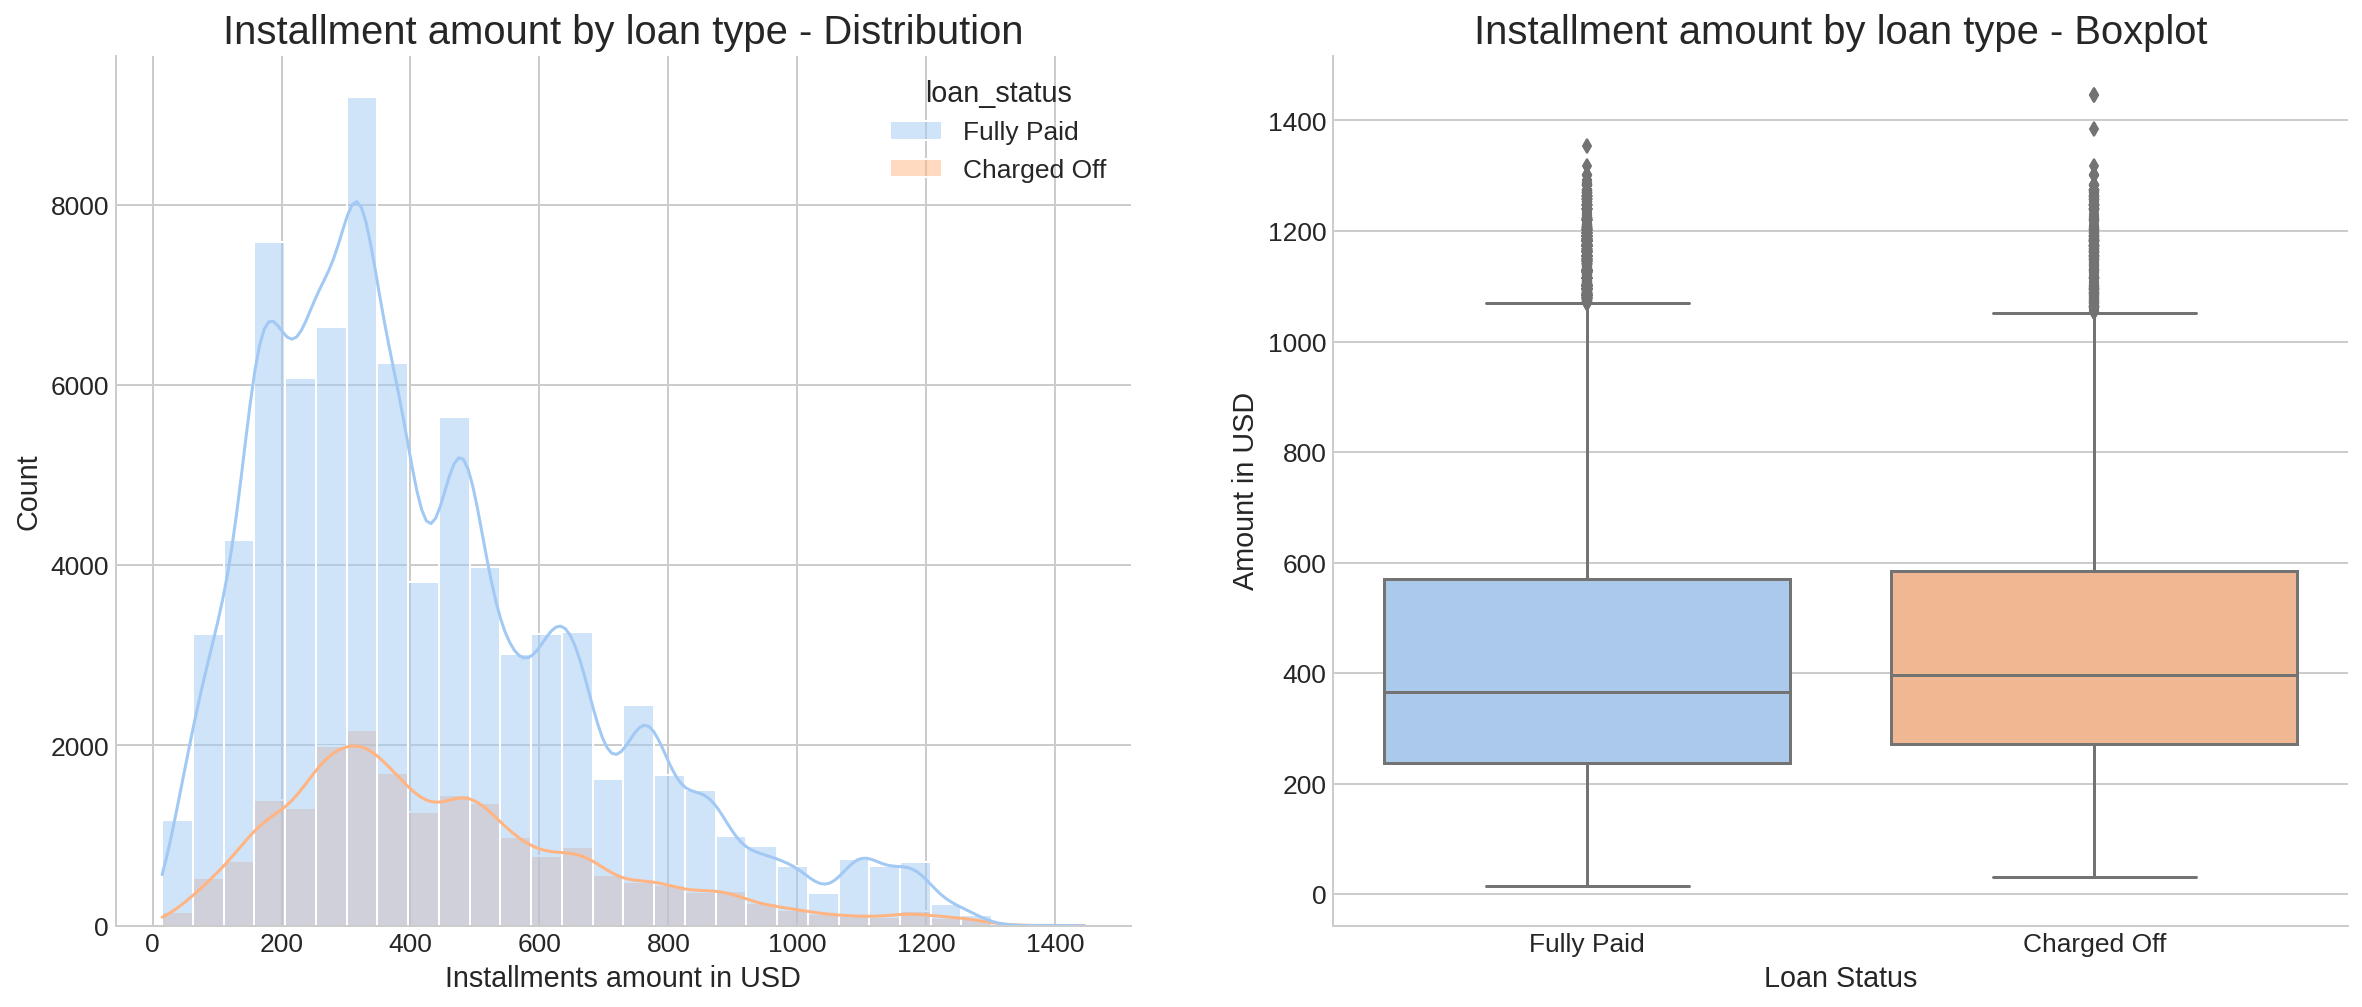

In [ ]:
# Installment amount count by loan status

fig, ax =plt.subplots(1,2,figsize=(20,8))

sns.despine() 

ax[0].tick_params(axis='x', labelrotation=0)
ax[0].set(xlabel='Installments amount in USD', ylabel='')
ax[0].set_title('Installment amount by loan type - Distribution', size=20)
ax[1].tick_params(axis='x', labelrotation=0)
ax[1].set_title('Installment amount by loan type - Boxplot', size=20)


sns.histplot(data=df_trim,x="installment",hue="loan_status",bins=30,
            kde=True,ax=ax[0])
sns.boxplot(data=df_trim,x="loan_status",y="installment",ax=ax[1]).set(xlabel='Loan Status', 
                                                                       ylabel='Amount in USD')

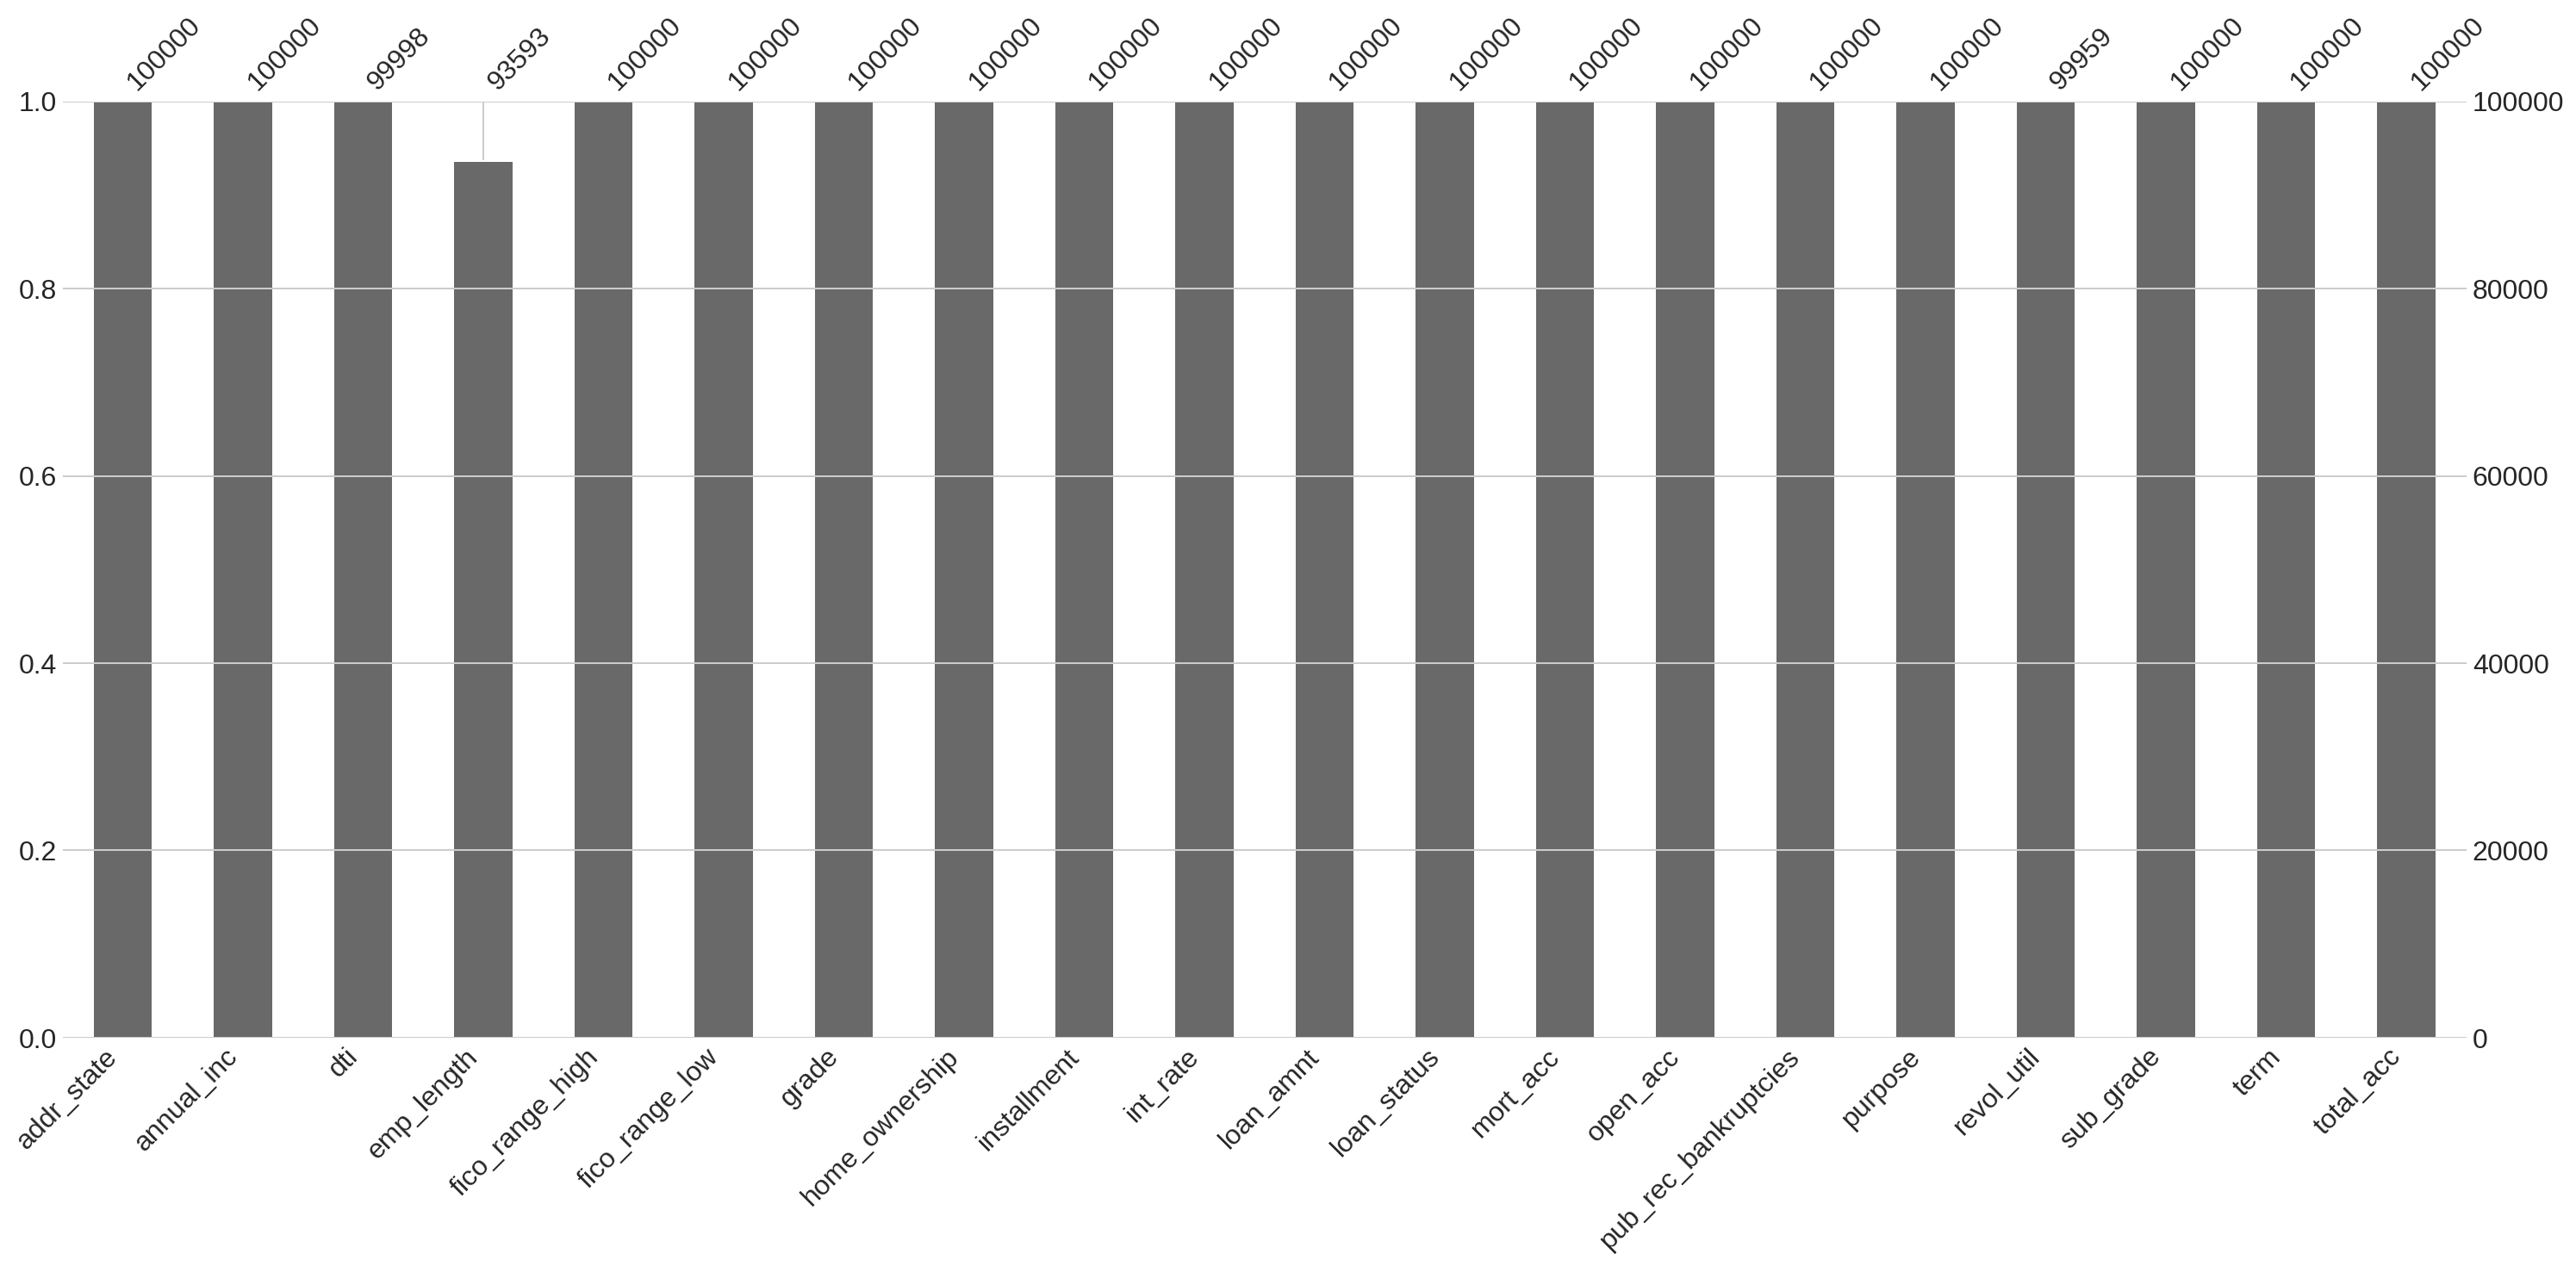

In [ ]:
ax=msno.bar(df_trim)

In [ ]:
df_trim=df_trim.dropna()

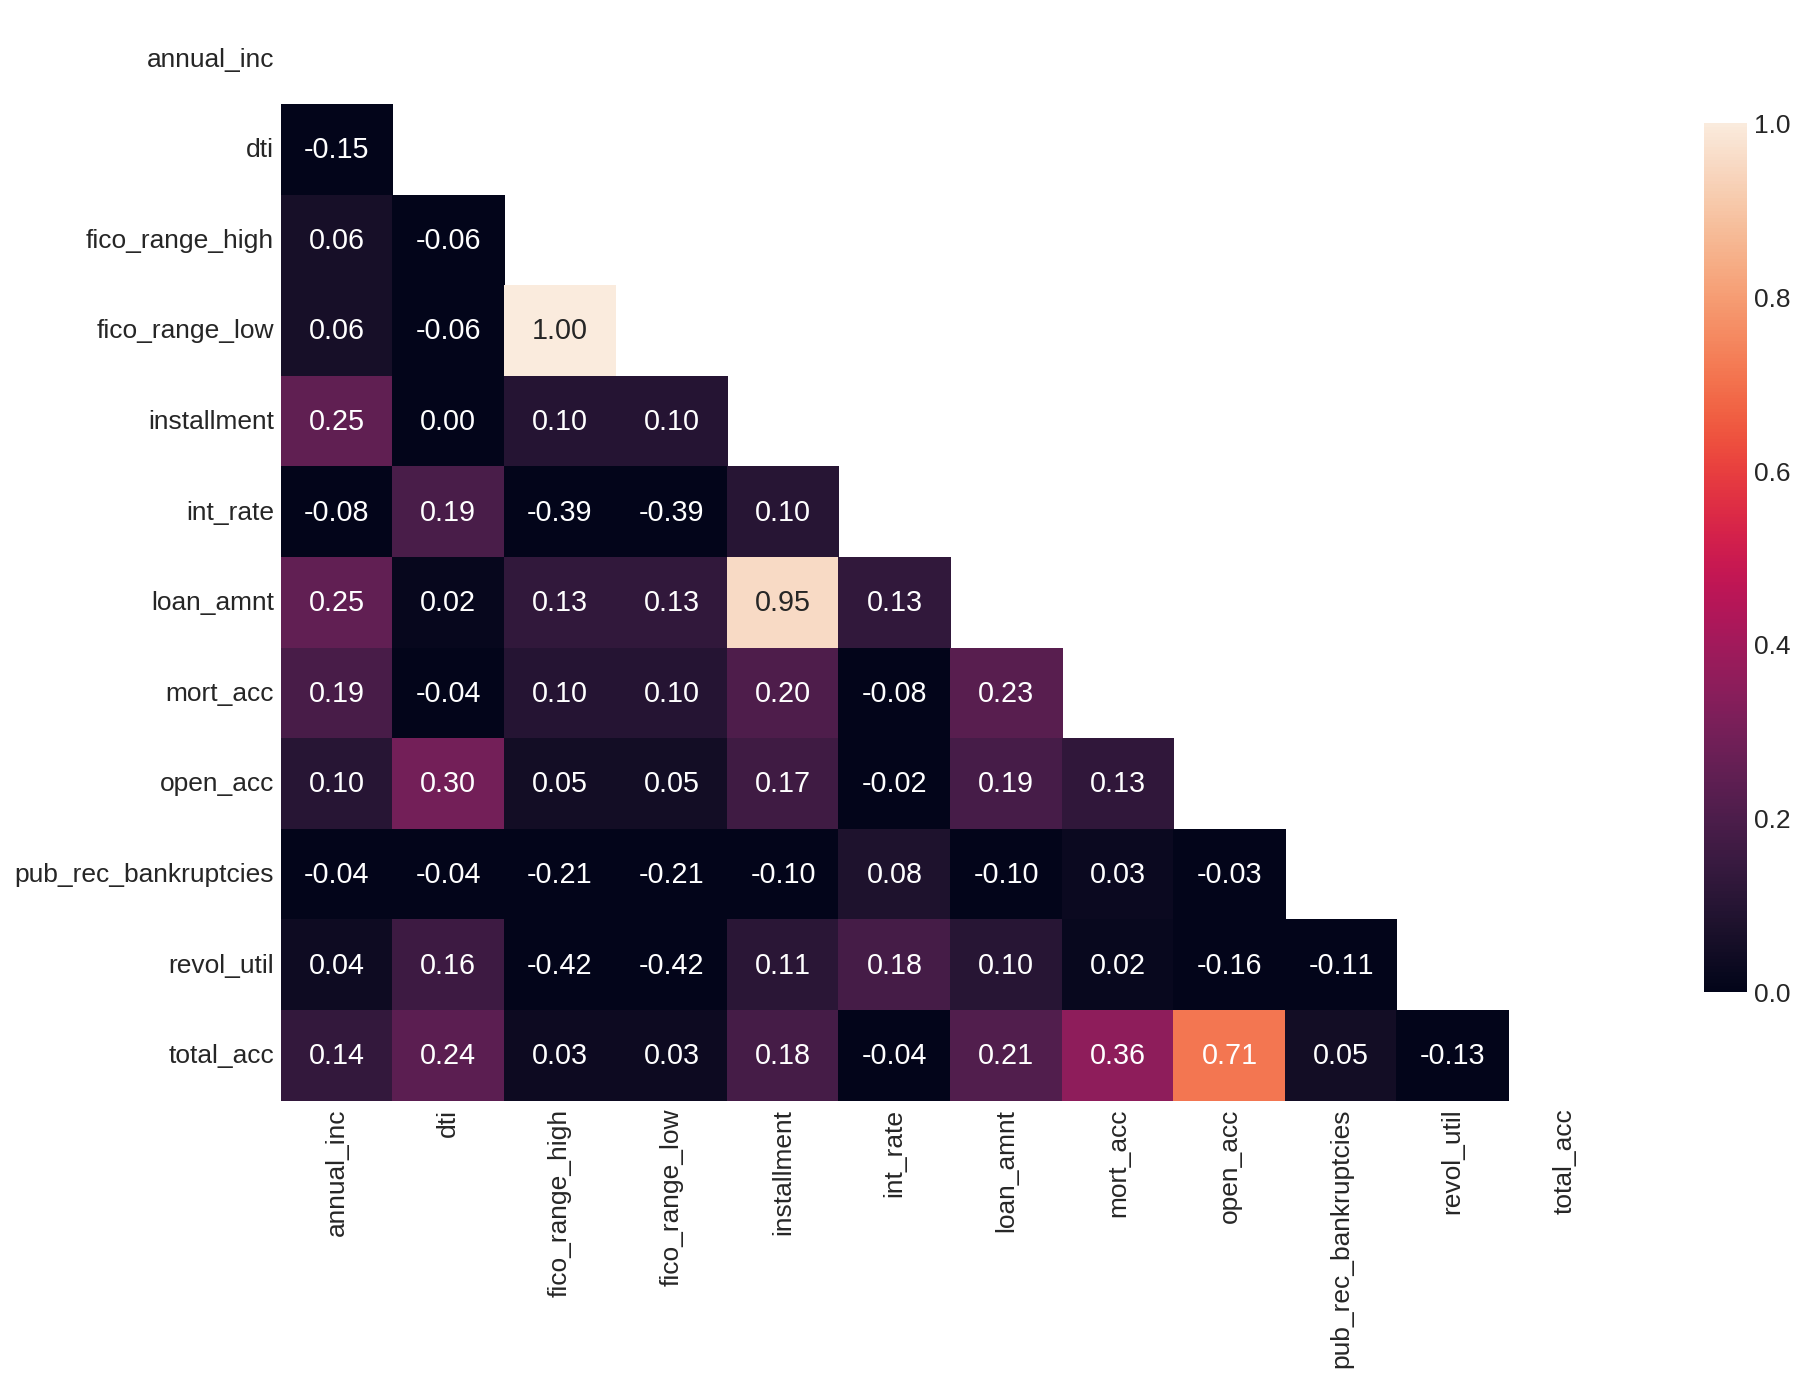

In [ ]:
# Numeric features correlation heatmap

corr=df_trim.loc[:,df_trim.columns!="loan_status"].corr()
mask= np.triu(np.ones_like(corr,dtype=np.bool))
fig,ax= plt.subplots(figsize=(15,10))
sns.heatmap(corr,mask=mask, annot=True, fmt=".2f",cbar_kws={"shrink": .8}, vmin=0, vmax=1)
None

In [ ]:
# Selecting categorial features  

cat=df_trim.select_dtypes(include=['object']).columns
cat

Index(['addr_state', 'emp_length', 'grade', 'home_ownership', 'loan_status',
       'purpose', 'sub_grade', 'term'],
      dtype='object')

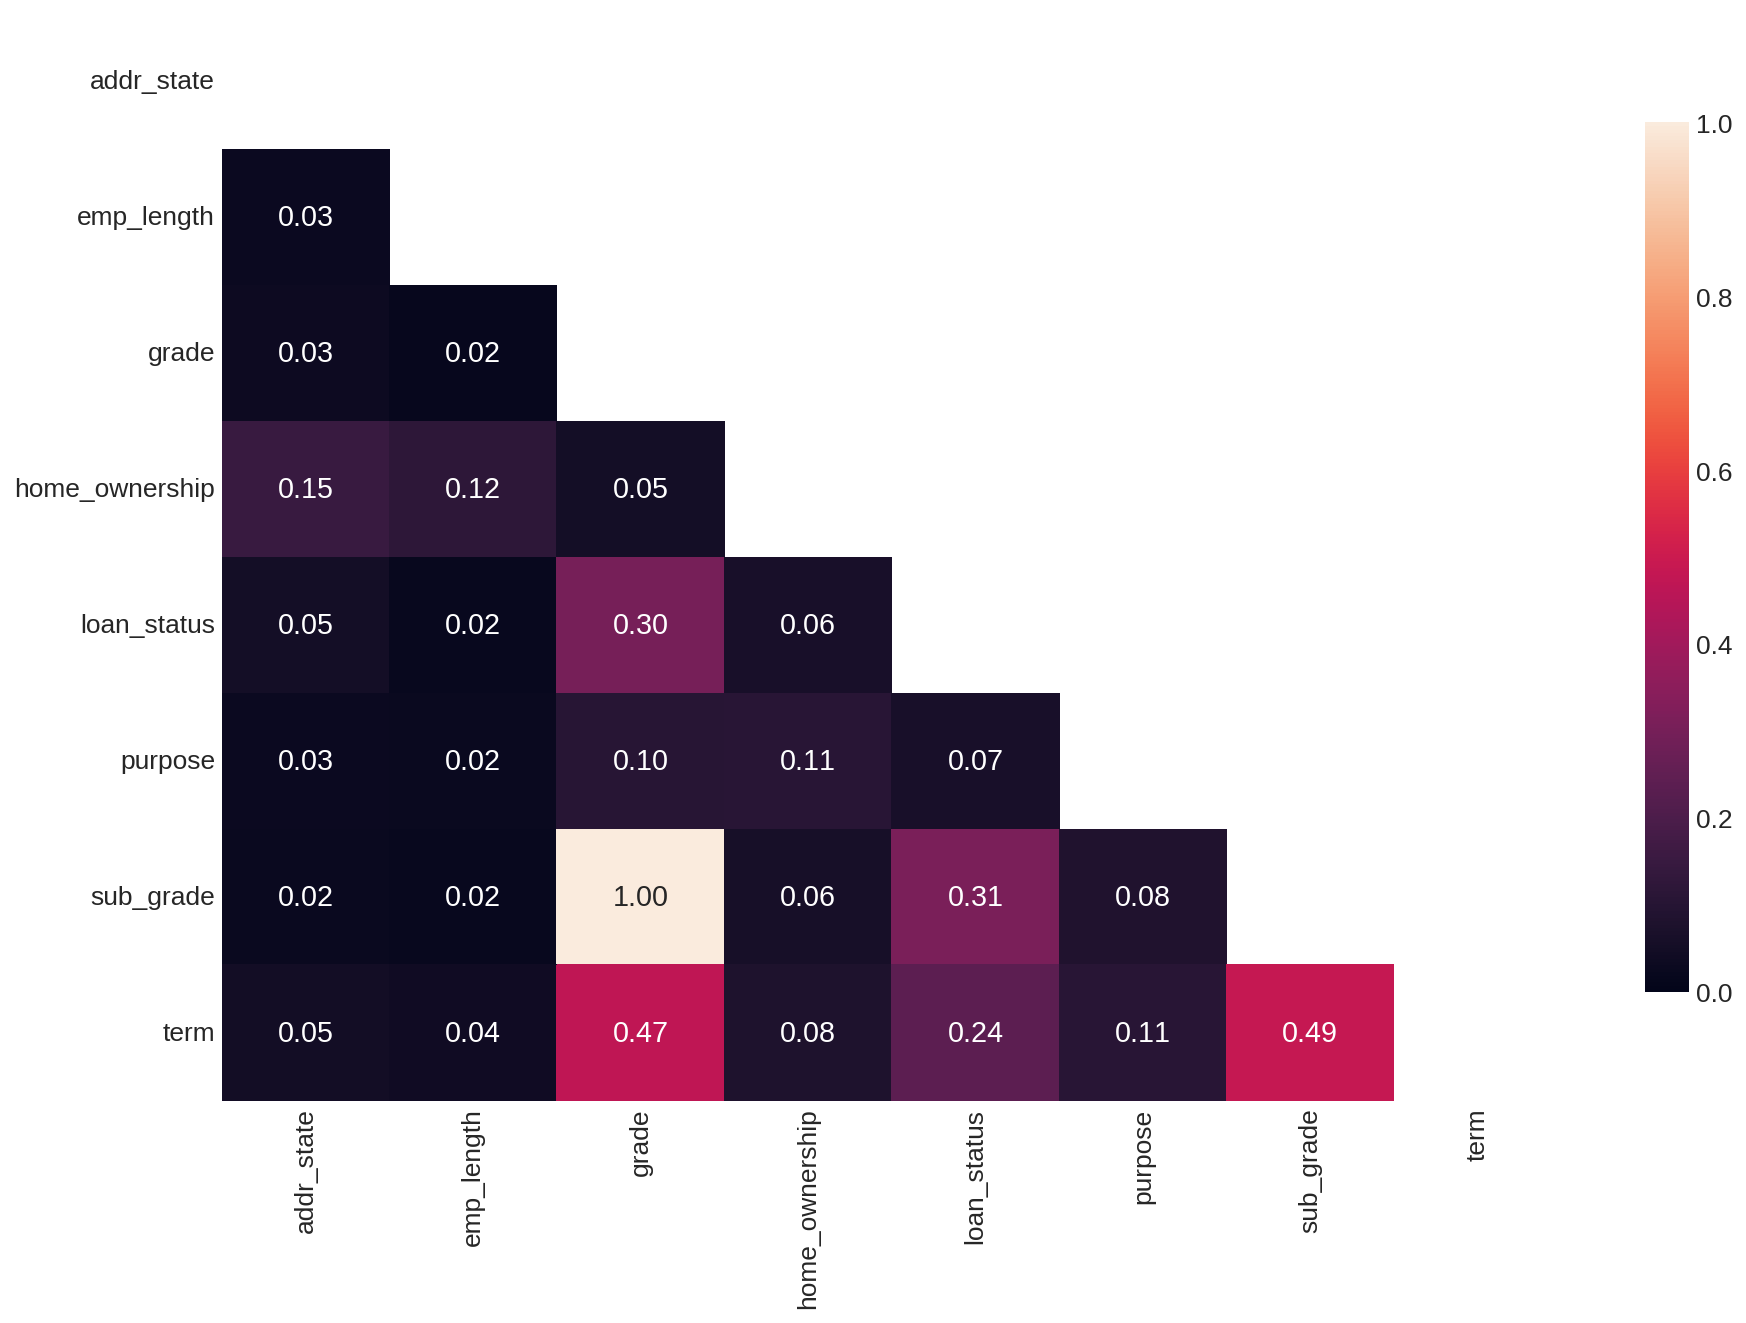

In [ ]:
# Applying Cramer's V and generating a correlation heatmap of the categorical features

c=df_trim[cat]

c = c.apply(
        lambda x: x.astype("category") if x.dtype == "O" else x)

cramersv = am.CramersV(c) 

corr=cramersv.fit()

fig,ax= plt.subplots(figsize=(15,10))
mask= np.triu(np.ones_like(corr,dtype=np.bool))
sns.heatmap(corr,mask=mask ,annot=True, fmt=".2f",cbar_kws={"shrink": .8}, vmin=0, vmax=1)
None

In [ ]:
df_trim=df_trim.drop(["grade"],axis=1)

In [ ]:
# Separating the target from the features

y=df_trim["loan_status"]
X=df_trim.drop(['loan_status'],axis=1)

In [ ]:
# Encoding categorical features through OHE

OH = pd.get_dummies(X[['addr_state',  'home_ownership', 'purpose', 'sub_grade','term']], drop_first=True)

X=X.drop(['addr_state', 'home_ownership', 'purpose', 'sub_grade','term'],axis=1)

X = pd.concat([X,OH],axis=1)

In [ ]:

X.columns.to_list()

['annual_inc',
 'dti',
 'emp_length',
 'fico_range_high',
 'fico_range_low',
 'installment',
 'int_rate',
 'loan_amnt',
 'mort_acc',
 'open_acc',
 'pub_rec_bankruptcies',
 'revol_util',
 'total_acc',
 'addr_state_AL',
 'addr_state_AR',
 'addr_state_AZ',
 'addr_state_CA',
 'addr_state_CO',
 'addr_state_CT',
 'addr_state_DC',
 'addr_state_DE',
 'addr_state_FL',
 'addr_state_GA',
 'addr_state_HI',
 'addr_state_IL',
 'addr_state_IN',
 'addr_state_KS',
 'addr_state_KY',
 'addr_state_LA',
 'addr_state_MA',
 'addr_state_MD',
 'addr_state_ME',
 'addr_state_MI',
 'addr_state_MN',
 'addr_state_MO',
 'addr_state_MS',
 'addr_state_MT',
 'addr_state_NC',
 'addr_state_ND',
 'addr_state_NE',
 'addr_state_NH',
 'addr_state_NJ',
 'addr_state_NM',
 'addr_state_NV',
 'addr_state_NY',
 'addr_state_OH',
 'addr_state_OK',
 'addr_state_OR',
 'addr_state_PA',
 'addr_state_RI',
 'addr_state_SC',
 'addr_state_SD',
 'addr_state_TN',
 'addr_state_TX',
 'addr_state_UT',
 'addr_state_VA',
 'addr_state_VT',
 'addr_s

In [ ]:
# Splitting the dataset between training and validation set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=29)

In [ ]:
# Baseline Model (should output around 80 % acc.)

bm= DummyClassifier(random_state = 0)
bm.fit(X_train,y_train)
score_bm=bm.score(X_test, y_test)

print("\n\nAccuracy of baseline dummy model is: " + str(score_bm) + " %")



Accuracy of baseline dummy model is: 0.8025225803003581 %


In [ ]:
bm.predict(X_test)

array(['Fully Paid', 'Fully Paid', 'Fully Paid', ..., 'Fully Paid',
       'Fully Paid', 'Fully Paid'], dtype='<U10')

In [ ]:
# Making predictions with the Baseline model

predictions = (bm.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test,predictions))


TypeError: ignored

In [ ]:
# Min Max scaling the features  

scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: ignored

In [ ]:
X_train.shape

(74842, 110)